<a href="https://colab.research.google.com/github/404himel/ML/blob/main/arsenic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/NationalSurveyData.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/NationalSurveyData.csv'

In [ ]:
df.shape

(3533, 34)

In [ ]:
df.head()

,SAMPLE_ID,SAMPLE_FIELD_ID,SAMPLE_DATE,LAT_DEG,LONG_DEG,YEAR_CONSTRUCTION,WELL_TYPE,WELL_DEPTH(M),DIVISION,DISTRICT,...,Li mg/L,Mg mg/L,Mn mg/L,Na mg/L,P_ mg/L,Si mg/L,SO4 mg/L,Sr mg/L,V_ mg/L,Zn mg/L
0,S98_00701,"RIP3491, BTS101",06/03/1998,22.8731,90.7844,1992.0,Shallow HP TW,10.7,Chittagong,Lakshmipur,...,< 0.003,32.7,0.624,211.0,0.7,12.2,1.2,0.304,< 0.006,0.049
1,S98_00718,"RIP3492, BTS118",08/03/1998,23.0194,90.8786,1971.0,Shallow HP TW,12.2,Chittagong,Lakshmipur,...,< 0.003,29.9,0.447,7.9,1.2,13.9,< 0.2,0.246,< 0.006,0.031
2,S98_00724,"RIP3493, BTS124",10/03/1998,22.9650,90.9597,1995.0,Private HP TW,12.2,Chittagong,Lakshmipur,...,0.003,15.7,0.231,205.0,0.6,13.8,1.5,0.108,< 0.006,0.021
3,S98_00727,"RIP3498, BTS127",10/03/1998,22.9253,90.9744,1997.0,Private HP TW,262.1,Chittagong,Lakshmipur,...,0.018,75.8,0.294,201.0,0.3,27.2,4.9,0.873,< 0.006,0.067
4,S98_00733,"RIP3494, BTS133",11/03/1998,22.8653,90.9372,1993.0,Private HP TW,7.9,Chittagong,Lakshmipur,...,0.012,124,1.17,1090.0,0.5,10.3,265,0.797,0.009,0.054


In [ ]:
df.columns

Index(['SAMPLE_ID', 'SAMPLE_FIELD_ID', 'SAMPLE_DATE', 'LAT_DEG', 'LONG_DEG',
       'YEAR_CONSTRUCTION', 'WELL_TYPE', 'WELL_DEPTH(M)', 'DIVISION',
       'DISTRICT', 'THANA', 'UNION', 'MOUZA', 'GEOCODE', 'As (ug/l)',
       'Al mg/L', 'B_(mg/L)', 'Ba mg/L', 'Ca mg/L', 'Co mg/L', 'Cr mg/L',
       'Cu mg/L', 'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L', 'Mn mg/L',
       'Na mg/L', 'P_ mg/L', 'Si mg/L', 'SO4 mg/L', 'Sr mg/L', 'V_ mg/L',
       'Zn mg/L'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533 entries, 0 to 3532
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SAMPLE_ID          3533 non-null   object 
 1   SAMPLE_FIELD_ID    3533 non-null   object 
 2   SAMPLE_DATE        3533 non-null   object 
 3   LAT_DEG            3533 non-null   float64
 4   LONG_DEG           3533 non-null   float64
 5   YEAR_CONSTRUCTION  3491 non-null   float64
 6   WELL_TYPE          3526 non-null   object 
 7   WELL_DEPTH(M)      3533 non-null   float64
 8   DIVISION           3533 non-null   object 
 9   DISTRICT           3533 non-null   object 
 10  THANA              3533 non-null   object 
 11  UNION              3526 non-null   object 
 12  MOUZA              3524 non-null   object 
 13  GEOCODE            3533 non-null   int64  
 14  As (ug/l)          3533 non-null   object 
 15  Al mg/L            3527 non-null   object 
 16  B_(mg/L)           3528 

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
SAMPLE_ID,0
SAMPLE_FIELD_ID,0
SAMPLE_DATE,0
LAT_DEG,0
LONG_DEG,0
YEAR_CONSTRUCTION,42
WELL_TYPE,7
WELL_DEPTH(M),0
DIVISION,0
DISTRICT,0


In [ ]:
len(df['WELL_TYPE'].unique())

28

In [ ]:
len(df['MOUZA'].unique())

3004

In [ ]:
len(df['GEOCODE'].unique())

3258

In [ ]:
df.drop(['SAMPLE_ID','SAMPLE_FIELD_ID','SAMPLE_DATE','GEOCODE'],axis=1,inplace=True)

In [ ]:
df.drop(['YEAR_CONSTRUCTION'],axis=1,inplace=True)

In [ ]:
df

,LAT_DEG,LONG_DEG,WELL_TYPE,WELL_DEPTH(M),DIVISION,DISTRICT,THANA,UNION,MOUZA,As (ug/l),...,Li mg/L,Mg mg/L,Mn mg/L,Na mg/L,P_ mg/L,Si mg/L,SO4 mg/L,Sr mg/L,V_ mg/L,Zn mg/L
0,22.8731,90.7844,Shallow HP TW,10.7,Chittagong,Lakshmipur,Lakshmipur Sadar,Shakchar,Char Ramani Mohan,13,...,< 0.003,32.7,0.624,211.0,0.7,12.2,1.2,0.304,< 0.006,0.049
1,23.0194,90.8786,Shallow HP TW,12.2,Chittagong,Lakshmipur,Lakshmipur Sadar,Baksipur,Nandigram,256,...,< 0.003,29.9,0.447,7.9,1.2,13.9,< 0.2,0.246,< 0.006,0.031
2,22.9650,90.9597,Private HP TW,12.2,Chittagong,Lakshmipur,Lakshmipur Sadar,Uttar Joypur,Chandra Prabhabag,38,...,0.003,15.7,0.231,205.0,0.6,13.8,1.5,0.108,< 0.006,0.021
3,22.9253,90.9744,Private HP TW,262.1,Chittagong,Lakshmipur,Lakshmipur Sadar,Chandraganj,Ganipur,8,...,0.018,75.8,0.294,201.0,0.3,27.2,4.9,0.873,< 0.006,0.067
4,22.8653,90.9372,Private HP TW,7.9,Chittagong,Lakshmipur,Lakshmipur Sadar,Kushakhali,Madna,< 6,...,0.012,124,1.17,1090.0,0.5,10.3,265,0.797,0.009,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,24.7733,88.8000,TARA,33.5,Rajshahi,Naogaon,Manda,Kansopara,Ilsagari,0.9,...,0.01,12.6,1.01,30.4,< 0.1,26.5,2.4,0.153,< 0.002,0.038
3529,24.7183,88.7750,TARA,34.4,Rajshahi,Naogaon,Manda,Kashab,Panjar Bhanga,4.7,...,0.022,18.6,0.346,237.0,0.2,24.7,< 0.2,0.263,< 0.002,0.016
3530,25.1039,88.5713,HTW,59.4,Rajshahi,Naogaon,Sapahar,Sapahar,Nurpur,< 0.5,...,0.005,11.2,0.125,17.4,< 0.1,15.7,0.6,0.17,< 0.002,0.032
3531,25.0296,88.6054,TARA,42.7,Rajshahi,Naogaon,Sapahar,Tilna,Doas,0.7,...,0.005,9.28,0.234,28.0,< 0.1,29.6,0.5,0.163,< 0.002,0.017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533 entries, 0 to 3532
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LAT_DEG        3533 non-null   float64
 1   LONG_DEG       3533 non-null   float64
 2   WELL_TYPE      3526 non-null   object 
 3   WELL_DEPTH(M)  3533 non-null   float64
 4   DIVISION       3533 non-null   object 
 5   DISTRICT       3533 non-null   object 
 6   THANA          3533 non-null   object 
 7   UNION          3526 non-null   object 
 8   MOUZA          3524 non-null   object 
 9   As (ug/l)      3533 non-null   object 
 10  Al mg/L        3527 non-null   object 
 11  B_(mg/L)       3528 non-null   object 
 12  Ba mg/L        3529 non-null   object 
 13  Ca mg/L        3529 non-null   object 
 14  Co mg/L        3529 non-null   object 
 15  Cr mg/L        3529 non-null   object 
 16  Cu mg/L        3529 non-null   object 
 17  Fe mg/L        3529 non-null   object 
 18  K_ mg/L 

In [ ]:
df['Al mg/L']

,Al mg/L
0,< 0.04
1,< 0.04
2,< 0.04
3,< 0.04
4,0.07
...,...
3528,0.02
3529,< 0.01
3530,< 0.01
3531,< 0.01


In [ ]:
columns_to_clean = [
    'As (ug/l)', 'Al mg/L', 'B_(mg/L)', 'Ba mg/L', 'Ca mg/L', 'Co mg/L', 'Cr mg/L',
    'Cu mg/L', 'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L', 'Mn mg/L',
    'P_ mg/L', 'Si mg/L', 'SO4 mg/L', 'Sr mg/L', 'V_ mg/L', 'Zn mg/L'
]

df[columns_to_clean] = df[columns_to_clean].replace(
    to_replace=r'[<>]', value='', regex=True
).apply(pd.to_numeric, errors='coerce')

# Optional: check result
print(df[columns_to_clean].dtypes)

As (ug/l)    float64
Al mg/L      float64
B_(mg/L)     float64
Ba mg/L      float64
Ca mg/L      float64
Co mg/L      float64
Cr mg/L      float64
Cu mg/L      float64
Fe mg/L      float64
K_ mg/L      float64
Li mg/L      float64
Mg mg/L      float64
Mn mg/L      float64
P_ mg/L      float64
Si mg/L      float64
SO4 mg/L     float64
Sr mg/L      float64
V_ mg/L      float64
Zn mg/L      float64
dtype: object


In [ ]:
df

,LAT_DEG,LONG_DEG,WELL_TYPE,WELL_DEPTH(M),DIVISION,DISTRICT,THANA,UNION,MOUZA,As (ug/l),...,Li mg/L,Mg mg/L,Mn mg/L,Na mg/L,P_ mg/L,Si mg/L,SO4 mg/L,Sr mg/L,V_ mg/L,Zn mg/L
0,22.8731,90.7844,Shallow HP TW,10.7,Chittagong,Lakshmipur,Lakshmipur Sadar,Shakchar,Char Ramani Mohan,13.0,...,0.003,32.70,0.624,211.0,0.7,12.2,1.2,0.304,0.006,0.049
1,23.0194,90.8786,Shallow HP TW,12.2,Chittagong,Lakshmipur,Lakshmipur Sadar,Baksipur,Nandigram,256.0,...,0.003,29.90,0.447,7.9,1.2,13.9,0.2,0.246,0.006,0.031
2,22.9650,90.9597,Private HP TW,12.2,Chittagong,Lakshmipur,Lakshmipur Sadar,Uttar Joypur,Chandra Prabhabag,38.0,...,0.003,15.70,0.231,205.0,0.6,13.8,1.5,0.108,0.006,0.021
3,22.9253,90.9744,Private HP TW,262.1,Chittagong,Lakshmipur,Lakshmipur Sadar,Chandraganj,Ganipur,8.0,...,0.018,75.80,0.294,201.0,0.3,27.2,4.9,0.873,0.006,0.067
4,22.8653,90.9372,Private HP TW,7.9,Chittagong,Lakshmipur,Lakshmipur Sadar,Kushakhali,Madna,6.0,...,0.012,124.00,1.170,1090.0,0.5,10.3,265.0,0.797,0.009,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,24.7733,88.8000,TARA,33.5,Rajshahi,Naogaon,Manda,Kansopara,Ilsagari,0.9,...,0.010,12.60,1.010,30.4,0.1,26.5,2.4,0.153,0.002,0.038
3529,24.7183,88.7750,TARA,34.4,Rajshahi,Naogaon,Manda,Kashab,Panjar Bhanga,4.7,...,0.022,18.60,0.346,237.0,0.2,24.7,0.2,0.263,0.002,0.016
3530,25.1039,88.5713,HTW,59.4,Rajshahi,Naogaon,Sapahar,Sapahar,Nurpur,0.5,...,0.005,11.20,0.125,17.4,0.1,15.7,0.6,0.170,0.002,0.032
3531,25.0296,88.6054,TARA,42.7,Rajshahi,Naogaon,Sapahar,Tilna,Doas,0.7,...,0.005,9.28,0.234,28.0,0.1,29.6,0.5,0.163,0.002,0.017


In [ ]:
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.fillna(col.mean()))

In [ ]:
col_cat = []
for col in df.select_dtypes(include='object').columns:
  col_cat.append(col)

In [ ]:
col_num = []
for col in df.select_dtypes(include='float').columns:
  col_num.append(col)

In [ ]:
print(len(col_cat))
print(len(col_num))

6
23


In [ ]:
df.isnull().sum()

,0
LAT_DEG,0
LONG_DEG,0
WELL_TYPE,7
WELL_DEPTH(M),0
DIVISION,0
DISTRICT,0
THANA,0
UNION,7
MOUZA,9
As (ug/l),0


In [ ]:

df = df.dropna(subset=['WELL_TYPE', 'UNION','MOUZA'])
df = df.reset_index(drop=True)


In [ ]:
df.shape

(3516, 29)

In [ ]:
df.isnull().sum()

,0
LAT_DEG,0
LONG_DEG,0
WELL_TYPE,0
WELL_DEPTH(M),0
DIVISION,0
DISTRICT,0
THANA,0
UNION,0
MOUZA,0
As (ug/l),0


In [ ]:
cor = df[col_num].corr()
cor['As (ug/l)'].sort_values(ascending=False)

,As (ug/l)
As (ug/l),1.000000
Ca mg/L,0.318833
Sr mg/L,0.299277
P_ mg/L,0.283200
Mg mg/L,0.273191
Ba mg/L,0.227380
K_ mg/L,0.181540
Fe mg/L,0.174830
LONG_DEG,0.122686
Na mg/L,0.043170


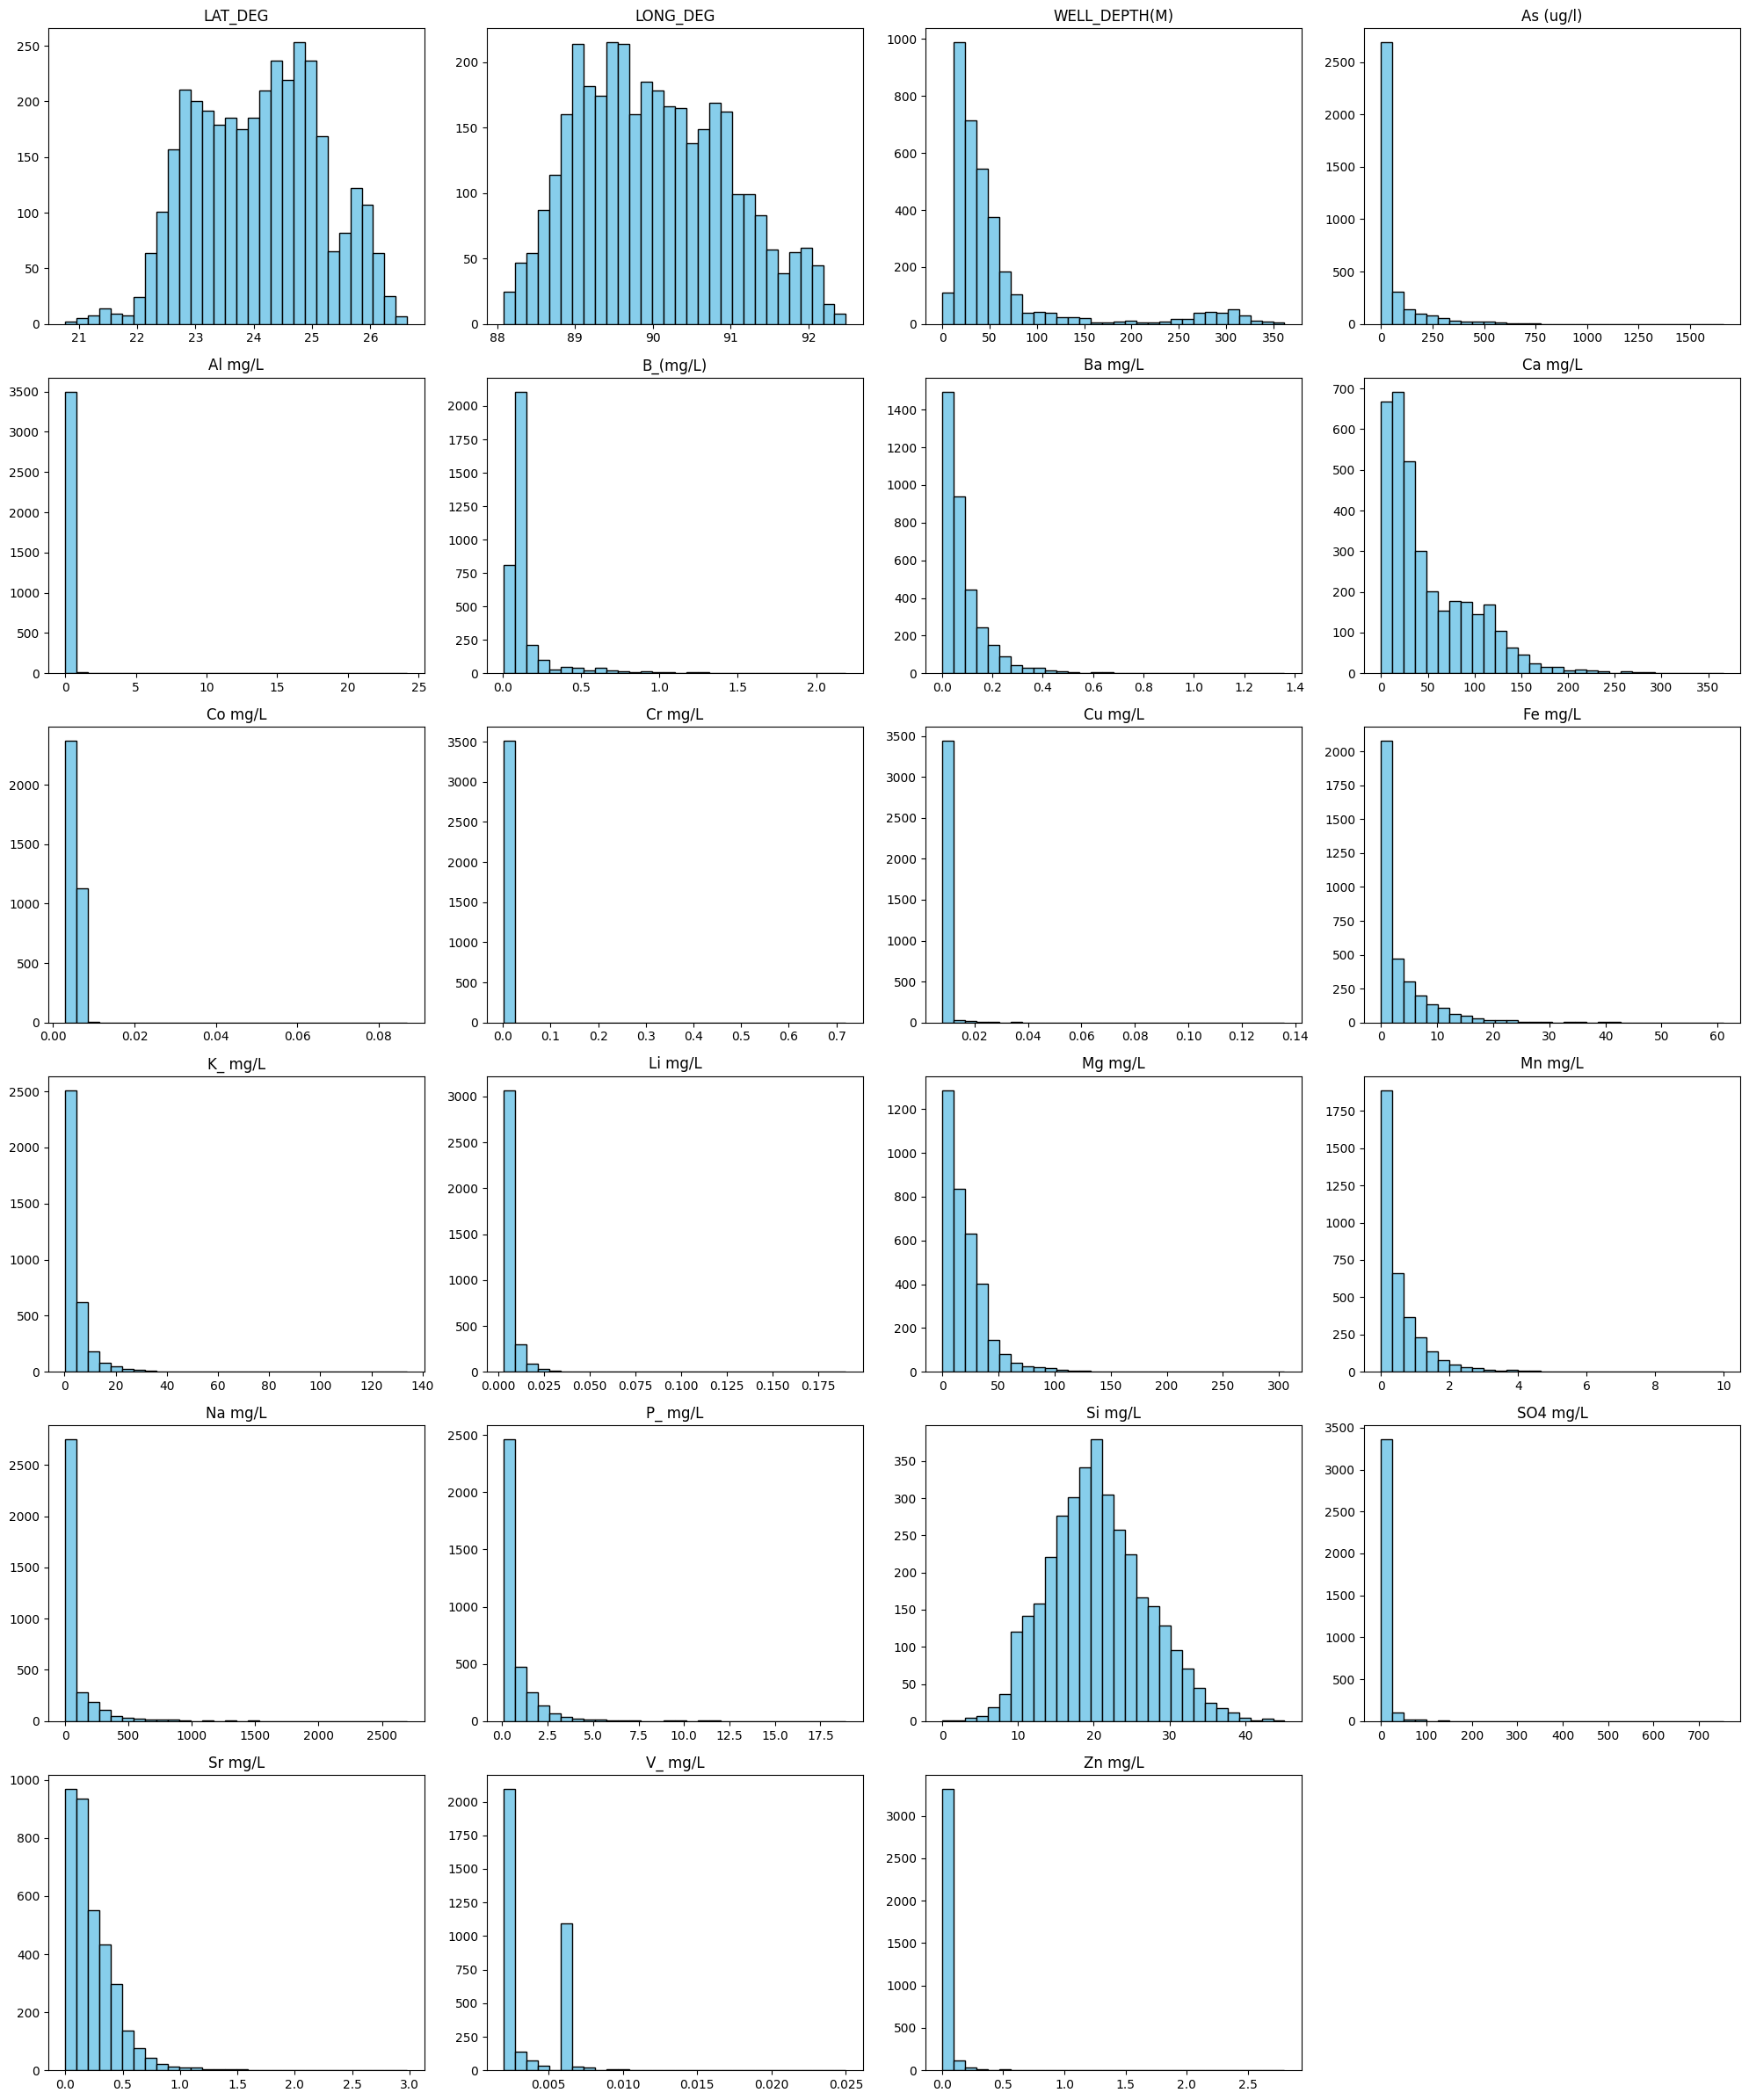

In [ ]:
import matplotlib.pyplot as plt

n_cols = 4
n_rows = -(-len(col_num) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, col in enumerate(col_num):
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/

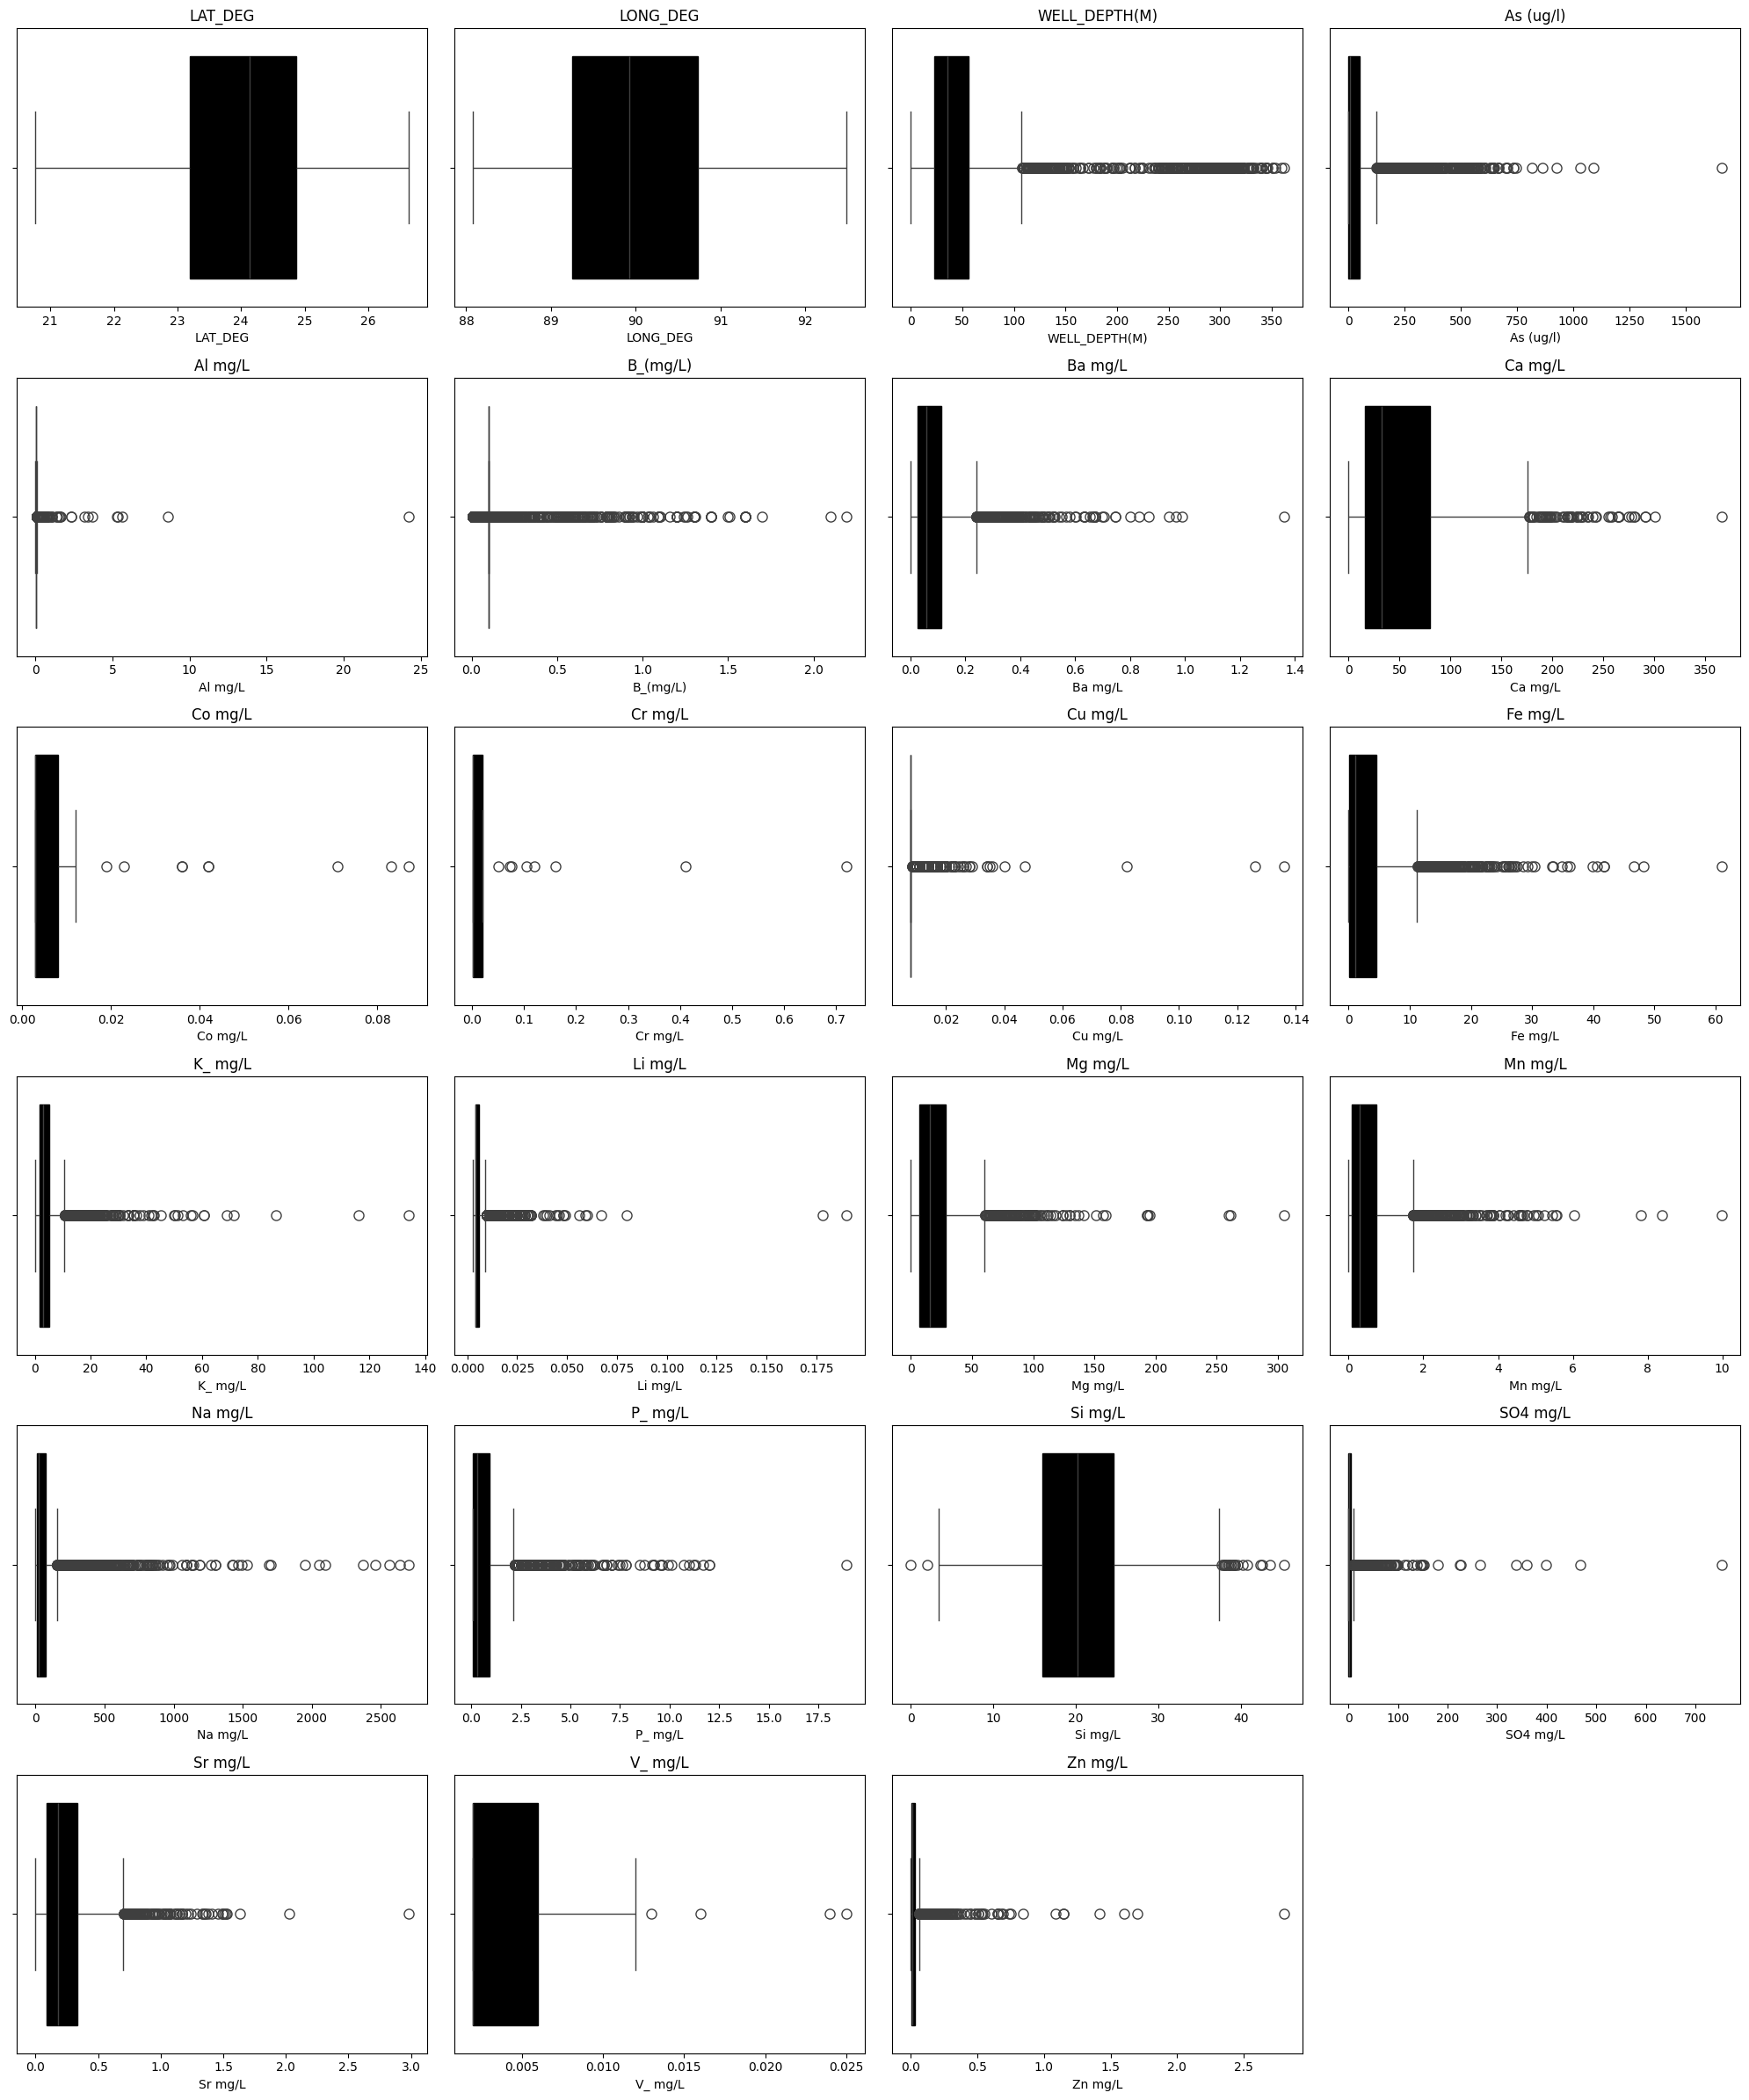

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Plot boxplots for all numerical columns
for idx, col in enumerate(col_num):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(x=df[col],
                boxprops=dict(color="black"),  # Set box color
                flierprops=dict(marker='o', color='red', markersize=8))  # Set outlier appearance
    plt.title(col)
    plt.tight_layout()

plt.show()


In [ ]:
df[col_num].columns

Index(['LAT_DEG', 'LONG_DEG', 'WELL_DEPTH(M)', 'As (ug/l)', 'Al mg/L',
       'B_(mg/L)', 'Ba mg/L', 'Ca mg/L', 'Co mg/L', 'Cr mg/L', 'Cu mg/L',
       'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L', 'Mn mg/L', 'Na mg/L',
       'P_ mg/L', 'Si mg/L', 'SO4 mg/L', 'Sr mg/L', 'V_ mg/L', 'Zn mg/L'],
      dtype='object')

In [ ]:
# List of columns to cap outliers
col_out = ['WELL_DEPTH(M)', 'Al mg/L', 'B_(mg/L)', 'Ba mg/L', 'Ca mg/L', 'Co mg/L', 'Cr mg/L', 'Cu mg/L',
           'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L', 'Mn mg/L', 'Na mg/L', 'P_ mg/L', 'Si mg/L',
           'SO4 mg/L', 'Sr mg/L', 'V_ mg/L', 'Zn mg/L']

# Apply capping on each column in col_out
for col in col_out:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify the changes
print(df[col_out].describe())


       WELL_DEPTH(M)      Al mg/L      B_(mg/L)      Ba mg/L      Ca mg/L  \
count    3516.000000  3516.000000  3.516000e+03  3516.000000  3516.000000   
mean       44.416297     0.035732  1.000000e-01     0.078952    50.845456   
std        29.430546     0.019284  3.247864e-15     0.066992    44.565476   
min         0.000000     0.010000  1.000000e-01     0.002000     0.100000   
25%        22.300000     0.020000  1.000000e-01     0.027000    15.800000   
50%        35.000000     0.040000  1.000000e-01     0.057000    32.850000   
75%        56.100000     0.040000  1.000000e-01     0.112000    80.125000   
max       106.800000     0.070000  1.000000e-01     0.239500   176.612500   

           Co mg/L      Cr mg/L       Cu mg/L      Fe mg/L      K_ mg/L  \
count  3516.000000  3516.000000  3.516000e+03  3516.000000  3516.000000   
mean      0.004667     0.007980  8.000000e-03     2.892945     3.950822   
std       0.002400     0.008584  6.280592e-16     3.588626     2.966540   
min   

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/

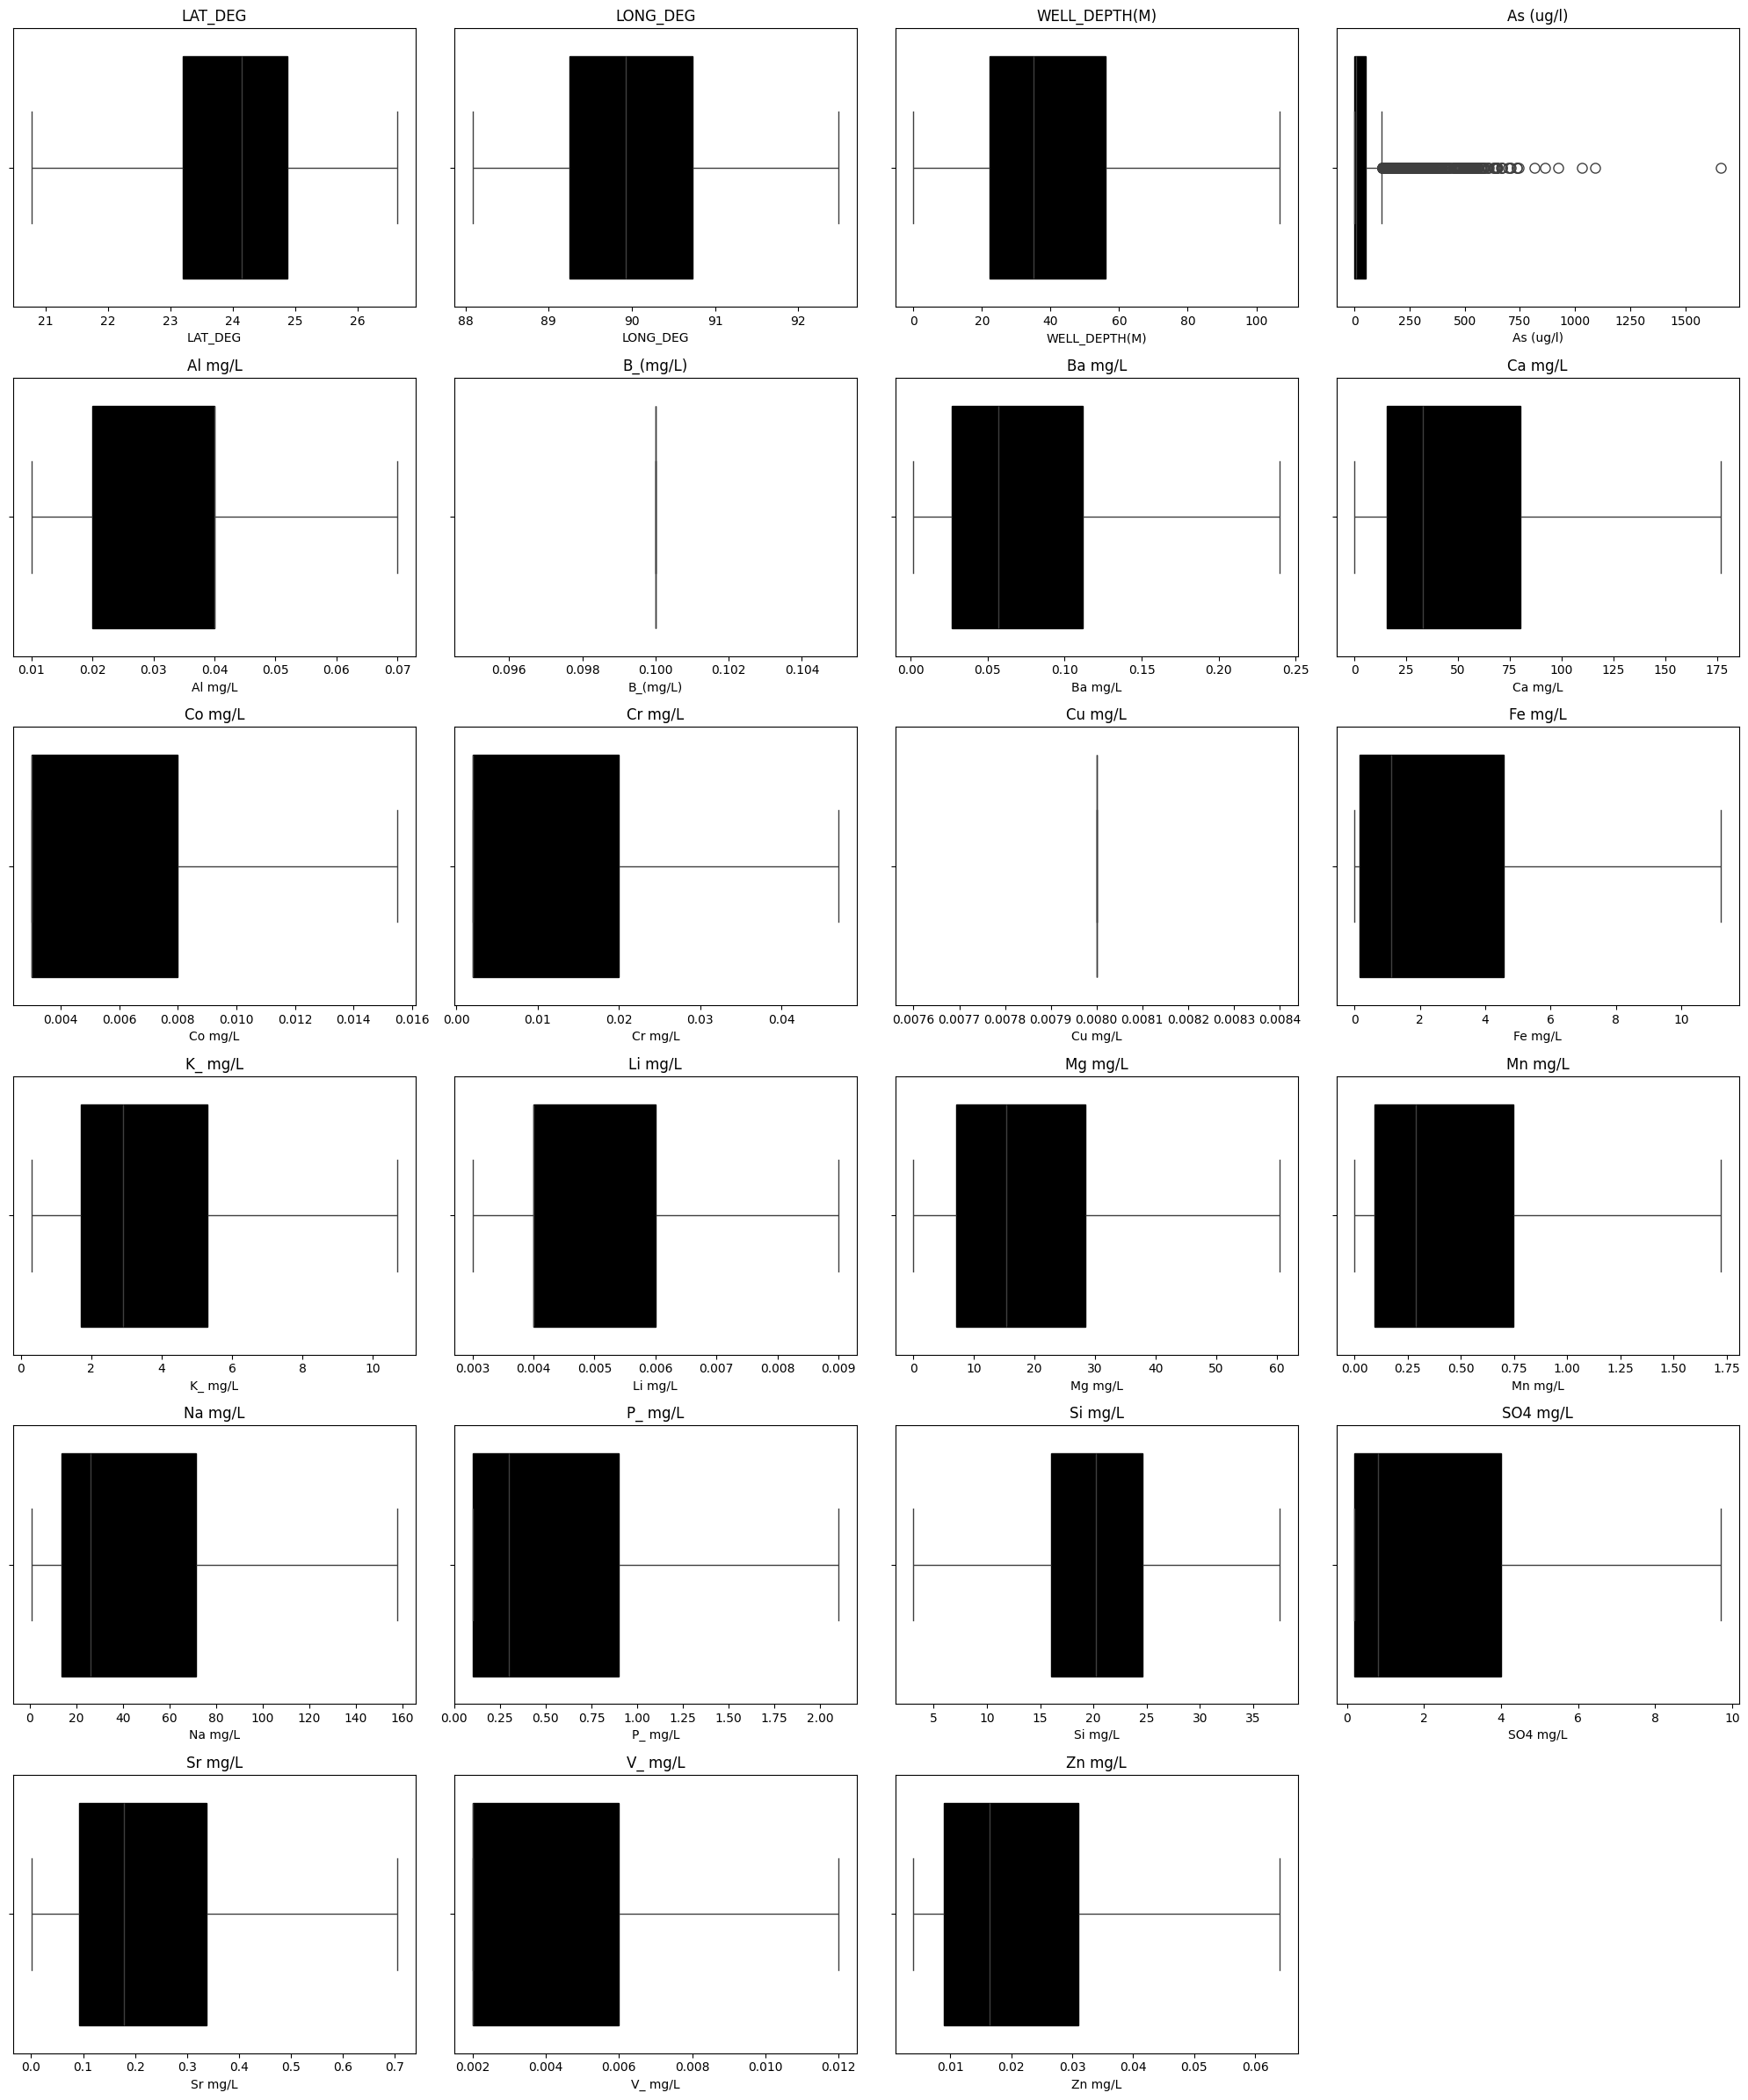

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Plot boxplots for all numerical columns
for idx, col in enumerate(col_num):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(x=df[col],
                boxprops=dict(color="black"),  # Set box color
                flierprops=dict(marker='o', color='red', markersize=8))  # Set outlier appearance
    plt.title(col)
    plt.tight_layout()

plt.show()


##Classification


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/arsenic_clean_data.csv')

In [ ]:
df.shape

(3516, 29)

In [ ]:
df.columns

Index(['LAT_DEG', 'LONG_DEG', 'WELL_TYPE', 'WELL_DEPTH(M)', 'DIVISION',
       'DISTRICT', 'THANA', 'UNION', 'MOUZA', 'As (ug/l)', 'Al mg/L',
       'B_(mg/L)', 'Ba mg/L', 'Ca mg/L', 'Co mg/L', 'Cr mg/L', 'Cu mg/L',
       'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L', 'Mn mg/L', 'Na mg/L',
       'P_ mg/L', 'Si mg/L', 'SO4 mg/L', 'Sr mg/L', 'V_ mg/L', 'Zn mg/L'],
      dtype='object')

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,LAT_DEG,LONG_DEG,WELL_DEPTH(M),As (ug/l),Al mg/L,B_(mg/L),Ba mg/L,Ca mg/L,Co mg/L,Cr mg/L,...,Li mg/L,Mg mg/L,Mn mg/L,Na mg/L,P_ mg/L,Si mg/L,SO4 mg/L,Sr mg/L,V_ mg/L,Zn mg/L
count,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3.516000e+03,3516.000000,3516.000000,3516.000000,3516.000000,...,3516.000000,3516.000000,3516.000000,3512.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000
mean,24.076802,90.015429,44.416297,55.673948,0.035732,1.000000e-01,0.078952,50.845456,0.004667,0.007980,...,0.005145,19.533692,0.492972,51.912352,0.618846,20.481535,2.688473,0.232966,0.003497,0.023594
std,1.081699,0.950890,29.430546,118.644741,0.019284,3.247864e-15,0.066992,44.565476,0.002400,0.008584,...,0.002055,15.510690,0.511933,53.357882,0.648004,6.347087,3.435668,0.176230,0.001970,0.018067
min,20.769000,88.084000,0.000000,0.500000,0.010000,1.000000e-01,0.002000,0.100000,0.003000,0.002000,...,0.003000,0.040000,0.001000,0.700000,0.100000,3.100000,0.200000,0.000400,0.002000,0.004000
25%,23.189750,89.253750,22.300000,0.500000,0.020000,1.000000e-01,0.027000,15.800000,0.003000,0.002000,...,0.004000,7.040000,0.094750,13.575000,0.100000,16.000000,0.200000,0.091875,0.002000,0.009000
50%,24.133200,89.930400,35.000000,5.800000,0.040000,1.000000e-01,0.057000,32.850000,0.003000,0.002000,...,0.004000,15.300000,0.289500,25.900000,0.300000,20.200000,0.800000,0.178000,0.002000,0.016500
75%,24.873300,90.734000,56.100000,50.100000,0.040000,1.000000e-01,0.112000,80.125000,0.008000,0.020000,...,0.006000,28.425000,0.745750,71.275000,0.900000,24.600000,4.000000,0.337000,0.006000,0.031000
max,26.633200,92.485000,106.800000,1660.000000,0.070000,1.000000e-01,0.239500,176.612500,0.015500,0.047000,...,0.009000,60.502500,1.722250,157.825000,2.100000,37.500000,9.700000,0.704688,0.012000,0.064000


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster



# ── 2. Define a function for color-coding based on arsenic risk ───────────────
# Using WHO guideline: >10 µg/L is considered 'unsafe'
def risk_color(arsenic_value):
    return 'red' if arsenic_value > 10 else 'green'

# ── 3. Create a base map centered on Bangladesh ─────────────────────────────────
map_bd = folium.Map(location=[23.6850, 90.3563], zoom_start=7)

# ── 4. Add a MarkerCluster to group nearby points ───────────────────────────────
marker_cluster = MarkerCluster().add_to(map_bd)

# ── 5. Loop through each row in df and add a CircleMarker ──────────────────────
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['LAT_DEG'], row['LONG_DEG']],
        radius=4,
        color=risk_color(row['As (ug/l)']),
        fill=True,
        fill_color=risk_color(row['As (ug/l)']),
        fill_opacity=0.7,
        popup=(
            f"Arsenic: {row['As (ug/l)']} µg/L<br>"
            f"Well Depth: {row['WELL_DEPTH(M)']} m<br>"
            f"Division: {row['DIVISION']}<br>"
            f"District: {row['DISTRICT']}"
        )
    ).add_to(marker_cluster)

# ── 6. Save the map to an HTML file ─────────────────────────────────────────────
map_bd.save("arsenic_risk_map.html")

print("Map saved as 'arsenic_risk_map.html'. Open this file in your browser to explore.")


Map saved as 'arsenic_risk_map.html'. Open this file in your browser to explore.


In [ ]:
len(df['DIVISION'].unique())

6

In [ ]:
len(df['DISTRICT'].unique())

61

In [ ]:
len(df['THANA'].unique())

432

In [ ]:
len(df['UNION'].unique())

2660

In [ ]:
len(df['MOUZA'].unique())

2996

In [ ]:
df['As (ug/l)'] = df['As (ug/l)'].apply(lambda val: 0 if val < 50.0 else 1)


In [ ]:
print(df['As (ug/l)'].value_counts())


As (ug/l)
0    2633
1     883
Name: count, dtype: int64


In [ ]:
high_arsenic_districts = df[df['As (ug/l)'] > 600.00]['DISTRICT'].unique()
print(high_arsenic_districts)


['Chandpur' 'Bagerhat' 'Kushtia' 'Barisal' 'Madaripur' 'Gopalganj'
 'Faridpur' 'Comilla' 'Brahamanbaria' 'Lakshmipur' 'Noakhali' 'Bogra'
 'Gaibandha']


In [ ]:
col_num = []
for col in df.select_dtypes(include=['float','int']).columns:
  col_num.append(col)

In [ ]:
df['neg_corr'] = df['Zn mg/L'] + df['Si mg/L'] + df['WELL_DEPTH(M)']

In [ ]:
df.drop(['Cr mg/L','Co mg/L','V_ mg/L','Mn mg/L','positive_corr','neg_corr'],axis=1,inplace=True)

In [ ]:
df.drop(['Zn mg/L','Si mg/L'],axis=1,inplace=True)

In [ ]:
df.drop(['B_(mg/L)','Cu mg/L'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['LAT_DEG', 'LONG_DEG', 'WELL_TYPE', 'WELL_DEPTH(M)', 'DIVISION',
       'DISTRICT', 'THANA', 'UNION', 'MOUZA', 'As (ug/l)', 'Al mg/L',
       'Ba mg/L', 'Ca mg/L', 'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L',
       'Na mg/L', 'P_ mg/L', 'Si mg/L', 'SO4 mg/L', 'Sr mg/L', 'Zn mg/L'],
      dtype='object')

In [ ]:
col_num = []
for col in df.select_dtypes(include=['float','int']).columns:
  col_num.append(col)

In [ ]:
cor = df[col_num].corr()

cor['As (ug/l)'].sort_values(ascending=False)

,As (ug/l)
As (ug/l),1.000000
P_ mg/L,0.508577
K_ mg/L,0.376792
Mg mg/L,0.369813
Sr mg/L,0.332215
Ba mg/L,0.324215
Fe mg/L,0.311268
Ca mg/L,0.306486
LONG_DEG,0.146688
Al mg/L,0.138139


In [ ]:
df.columns

Index(['LAT_DEG', 'LONG_DEG', 'WELL_TYPE', 'WELL_DEPTH(M)', 'DIVISION',
       'DISTRICT', 'THANA', 'UNION', 'MOUZA', 'As (ug/l)', 'Al mg/L',
       'Ba mg/L', 'Ca mg/L', 'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L',
       'Na mg/L', 'P_ mg/L', 'SO4 mg/L', 'Sr mg/L', 'neg_corr'],
      dtype='object')

In [ ]:
y = df['As (ug/l)']

X = df.drop(columns=['As (ug/l)'])

print(X.shape)

(3512, 26)


In [ ]:
X.shape

(3512, 21)

In [ ]:
col_cat = []
for i in df.select_dtypes(include='object').columns:
  col_cat.append(i)

In [ ]:
col_cat

['WELL_TYPE', 'DIVISION', 'DISTRICT', 'THANA', 'UNION', 'MOUZA']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2809, 26)
(703, 26)
(2809,)
(703,)


In [ ]:
col_cat

['WELL_TYPE', 'DIVISION', 'DISTRICT', 'THANA', 'UNION', 'MOUZA']

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
# Target Encoding
import category_encoders as ce

encoder = ce.TargetEncoder(cols=col_cat)
encoder.fit(X_train, y_train)

# Align columns before transforming
X_test = X_test[X_train.columns]

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)


In [ ]:
from scipy.stats import chi2_contingency

for col in col_cat:
    table = pd.crosstab(df[col], df['As (ug/l)'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")


WELL_TYPE: p-value = 0.0000 (Significant)
DIVISION: p-value = 0.0000 (Significant)
DISTRICT: p-value = 0.0000 (Significant)
THANA: p-value = 0.0000 (Significant)
UNION: p-value = 0.0108 (Significant)
MOUZA: p-value = 0.4219 (Not significant)


In [ ]:
X_train.drop(['MOUZA'],axis=1,inplace=True)
X_test.drop(['MOUZA'],axis=1,inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
X_train.columns

Index(['LAT_DEG', 'LONG_DEG', 'WELL_TYPE', 'WELL_DEPTH(M)', 'DIVISION',
       'DISTRICT', 'THANA', 'UNION', 'Al mg/L', 'Ba mg/L', 'Ca mg/L',
       'Co mg/L', 'Cr mg/L', 'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L',
       'Mn mg/L', 'Na mg/L', 'P_ mg/L', 'Si mg/L', 'SO4 mg/L', 'Sr mg/L',
       'V_ mg/L', 'Zn mg/L'],
      dtype='object')

In [ ]:
print(X_train_resampled.shape)

(4208, 25)


In [ ]:
col_num_train = []
for col in X_train.select_dtypes(include=['float','int']).columns:
  col_num_train.append(col)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train[col_num_train] = scaler.fit_transform(X_train[col_num_train])
X_test[col_num_train] = scaler.transform(X_test[col_num_train])


In [ ]:
X_train.columns

Index(['LAT_DEG', 'LONG_DEG', 'WELL_TYPE', 'WELL_DEPTH(M)', 'DIVISION',
       'DISTRICT', 'THANA', 'UNION', 'Al mg/L', 'Ba mg/L', 'Ca mg/L',
       'Co mg/L', 'Cr mg/L', 'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L',
       'Mn mg/L', 'Na mg/L', 'P_ mg/L', 'Si mg/L', 'SO4 mg/L', 'Sr mg/L',
       'V_ mg/L', 'Zn mg/L'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the classifier
rf_clf = RandomForestClassifier(random_state=42)

# 2. Train the model
rf_clf.fit(X_train, y_train)

# 3. Predict on test data
y_pred = rf_clf.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 5. Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.8421

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       527
           1       0.75      0.55      0.64       176

    accuracy                           0.84       703
   macro avg       0.81      0.75      0.77       703
weighted avg       0.83      0.84      0.83       703


Confusion Matrix:
 [[495  32]
 [ 79  97]]


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       527
           1       0.79      0.57      0.66       176

    accuracy                           0.85       703
   macro avg       0.83      0.76      0.78       703
weighted avg       0.85      0.85      0.84       703

[[500  27]
 [ 76 100]]
Accuracy Score: 85.35
Precision Score: 84.79
Recall Score: 85.35
F1 Score: 84.49
Best Parameters: {'n_estimators': 75, 'max_features': 'log2', 'criterion': 'log_loss'}
AUC Score: 0.9133


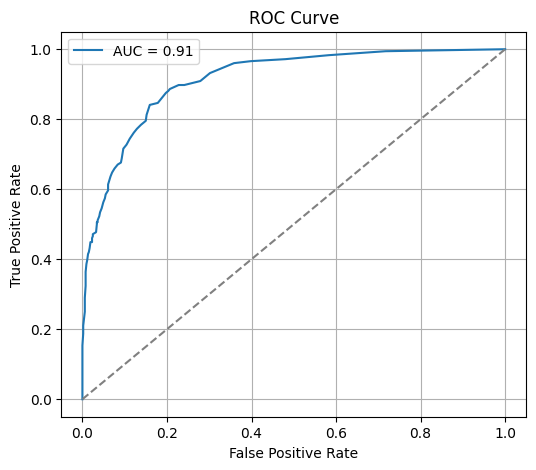

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Model and search
rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rcv_random = RandomizedSearchCV(rf, param_grid, cv=cv, n_iter=10, random_state=42)
rcv_random.fit(X_train, y_train)

# Predictions
y_pred_rcv = rcv_random.predict(X_test)
y_pred_proba = rcv_random.predict_proba(X_test)[:, 1]  # for AUC

# Evaluation
print(classification_report(y_test, y_pred_rcv))
print(confusion_matrix(y_test, y_pred_rcv))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rcv)*100:.2f}")
print(f"Precision Score: {precision_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print(f"Recall Score: {recall_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print("Best Parameters:", rcv_random.best_params_)

# AUC and ROC Curve (Only if it's binary classification)
if len(set(y_test)) == 2:
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("ROC Curve and AUC can only be plotted for binary classification.")


Confusion Matrix:
 [[503  24]
 [ 80  96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91       527
           1       0.80      0.55      0.65       176

    accuracy                           0.85       703
   macro avg       0.83      0.75      0.78       703
weighted avg       0.85      0.85      0.84       703

Accuracy: 0.8520625889046942
Precision: 0.8470617227320307
Recall: 0.8520625889046942
F1 Score: 0.8418002639908756
AUC Score: 0.9159


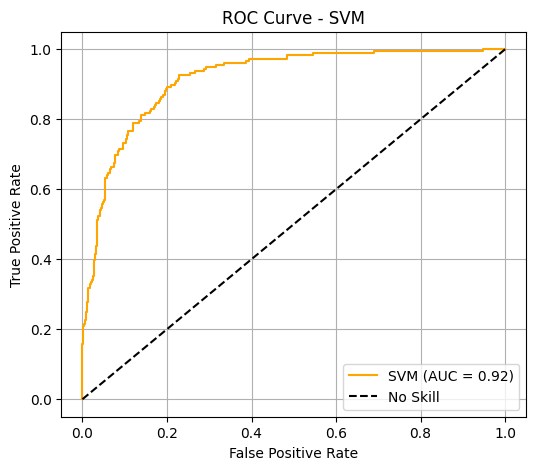

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Define param grid

# Enable probability for ROC/AUC
svm_model = SVC(probability=True)

# Random search CV
svm = svm_model
svm.fit(X_train, y_train)

# Predict
svm_pred = svm.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred, average='weighted'))
print("Recall:", recall_score(y_test, svm_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, svm_pred, average='weighted'))


# ✅ AUC and ROC (for binary classification)
if len(set(y_test)) == 2:
    y_prob = svm.predict_proba(X_test)[:, 1]  # Probability of class 1
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc:.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.2f})", color='orange')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - SVM")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("AUC and ROC Curve require binary classification.")


Confusion Matrix:
 [[474  53]
 [ 37 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       527
           1       0.72      0.79      0.76       176

    accuracy                           0.87       703
   macro avg       0.83      0.84      0.83       703
weighted avg       0.88      0.87      0.87       703

Accuracy: 0.871977240398293
Precision: 0.8766118832809532
Recall: 0.871977240398293
F1 Score: 0.8737736559326221
AUC Score: 0.9207


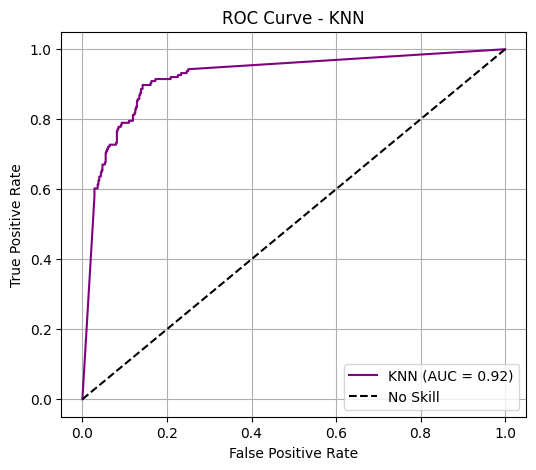

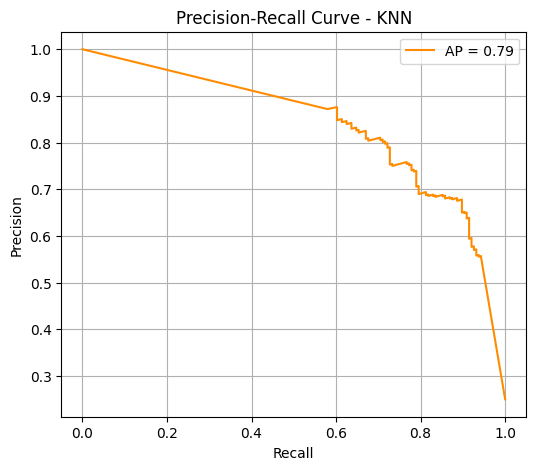

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import numpy as np

# 1. Skew correction
pt = PowerTransformer(method='yeo-johnson')
X_train_trans = pt.fit_transform(X_train)
X_test_trans = pt.transform(X_test)

# 2. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

# 3. Train KNN with improved parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_scaled, y_train)

# 4. Predictions
y_pred = knn.predict(X_test_scaled)

# 5. Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# 6. ROC Curve and AUC (for binary classification only)
if len(np.unique(y_test)) == 2:
    y_prob = knn.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})', color='purple')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='darkorange', label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - KNN')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("ROC and PR curves are for binary classification only.")


Confusion Matrix:
 [[474  53]
 [ 37 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       527
           1       0.72      0.79      0.76       176

    accuracy                           0.87       703
   macro avg       0.83      0.84      0.83       703
weighted avg       0.88      0.87      0.87       703

Accuracy: 0.871977240398293
Precision: 0.8766118832809532
Recall: 0.871977240398293
F1 Score: 0.8737736559326221
AUC Score: 0.9207


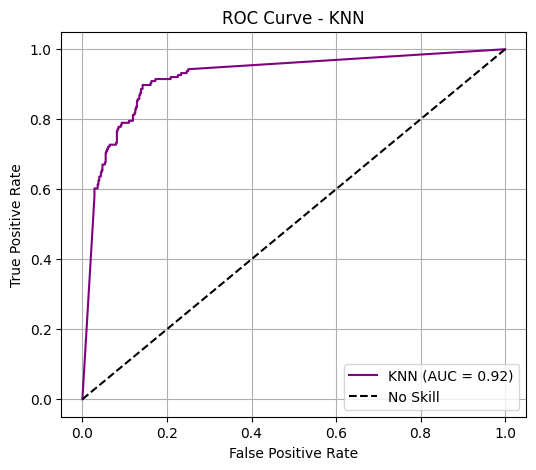

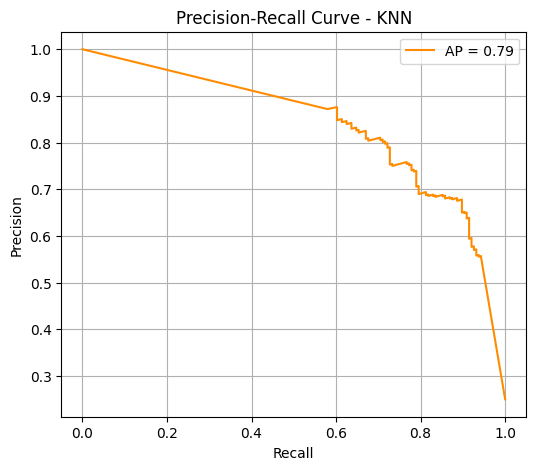

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import numpy as np

# 1. Skew correction
pt = PowerTransformer(method='yeo-johnson')
X_train_trans = pt.fit_transform(X_train)
X_test_trans = pt.transform(X_test)

# 2. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

# 3. Train KNN with improved parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_scaled, y_train)

# 4. Predictions
y_pred = knn.predict(X_test_scaled)

# 5. Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# 6. ROC Curve and AUC (for binary classification only)
if len(np.unique(y_test)) == 2:
    y_prob = knn.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})', color='purple')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='darkorange', label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - KNN')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("ROC and PR curves are for binary classification only.")



========== TRAINING RESULTS ==========
Confusion Matrix:
 [[2104    0]
 [   0  705]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2104
           1       1.00      1.00      1.00       705

    accuracy                           1.00      2809
   macro avg       1.00      1.00      1.00      2809
weighted avg       1.00      1.00      1.00      2809

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

========== TEST RESULTS ==========
Confusion Matrix:
 [[474  53]
 [ 37 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       527
           1       0.72      0.79      0.76       176

    accuracy                           0.87       703
   macro avg       0.83      0.84      0.83       703
weighted avg       0.88      0.87      0.87       703

Accuracy: 0.871977240398293
Precision: 0.8766118832809532
Recall: 0.871977240

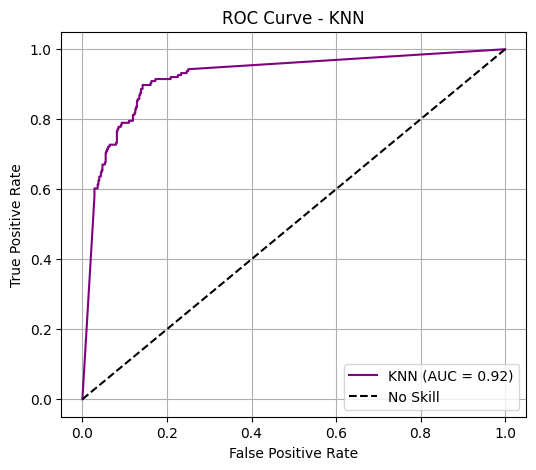

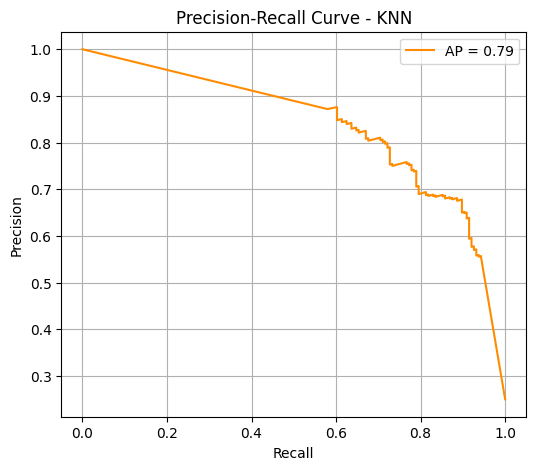

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import numpy as np

# 1. Skew correction
pt = PowerTransformer(method='yeo-johnson')
X_train_trans = pt.fit_transform(X_train)
X_test_trans = pt.transform(X_test)

# 2. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

# 3. Train KNN with improved parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_scaled, y_train)

# ===== Training Results =====
y_train_pred = knn.predict(X_train_scaled)
print("\n========== TRAINING RESULTS ==========")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))

# ===== Test Results =====
y_pred = knn.predict(X_test_scaled)
print("\n========== TEST RESULTS ==========")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# 6. ROC Curve and AUC (for binary classification only)
if len(np.unique(y_test)) == 2:
    y_prob = knn.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"\nAUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})', color='purple')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='darkorange', label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - KNN')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nROC and PR curves are for binary classification only.")


## LIME

In [ ]:
class_names = ['Safe','Unsafe']

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=class_names,       # e.g., ['setosa', 'versicolor', ...]
    mode='classification',         # ✅ MUST be lowercase
    discretize_continuous=True
)



In [ ]:
X_train.columns

Index(['LAT_DEG', 'LONG_DEG', 'WELL_TYPE', 'WELL_DEPTH(M)', 'DIVISION',
       'DISTRICT', 'THANA', 'UNION', 'Al mg/L', 'Ba mg/L', 'Ca mg/L',
       'Co mg/L', 'Cr mg/L', 'Fe mg/L', 'K_ mg/L', 'Li mg/L', 'Mg mg/L',
       'Mn mg/L', 'Na mg/L', 'P_ mg/L', 'Si mg/L', 'SO4 mg/L', 'Sr mg/L',
       'V_ mg/L', 'Zn mg/L'],
      dtype='object')

In [ ]:
exp = explainer.explain_instance(
    X_test.iloc[5].values,
    knn.predict_proba
)

exp.show_in_notebook(show_table=True)


##SHAP

In [ ]:
model = rf

PermutationExplainer explainer: 704it [02:46,  4.08it/s]
<ipython-input-53-e37cb0124af1>:16: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, class_idx], X_test, show=False)


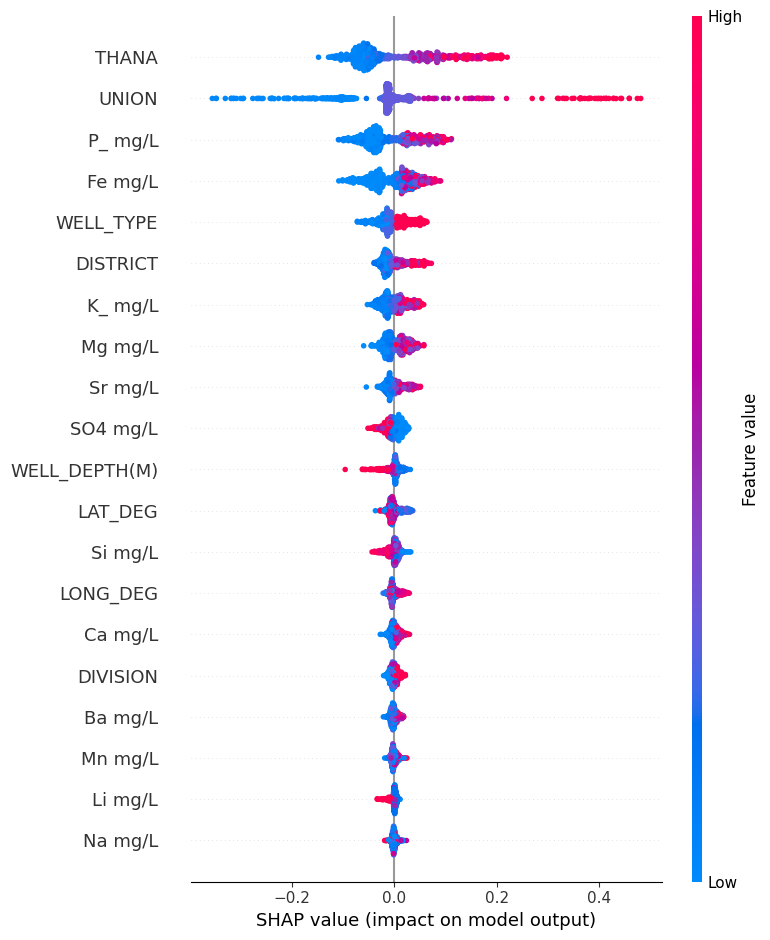

<ipython-input-53-e37cb0124af1>:21: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, class_idx], X_test, show=False)  # prevent auto show


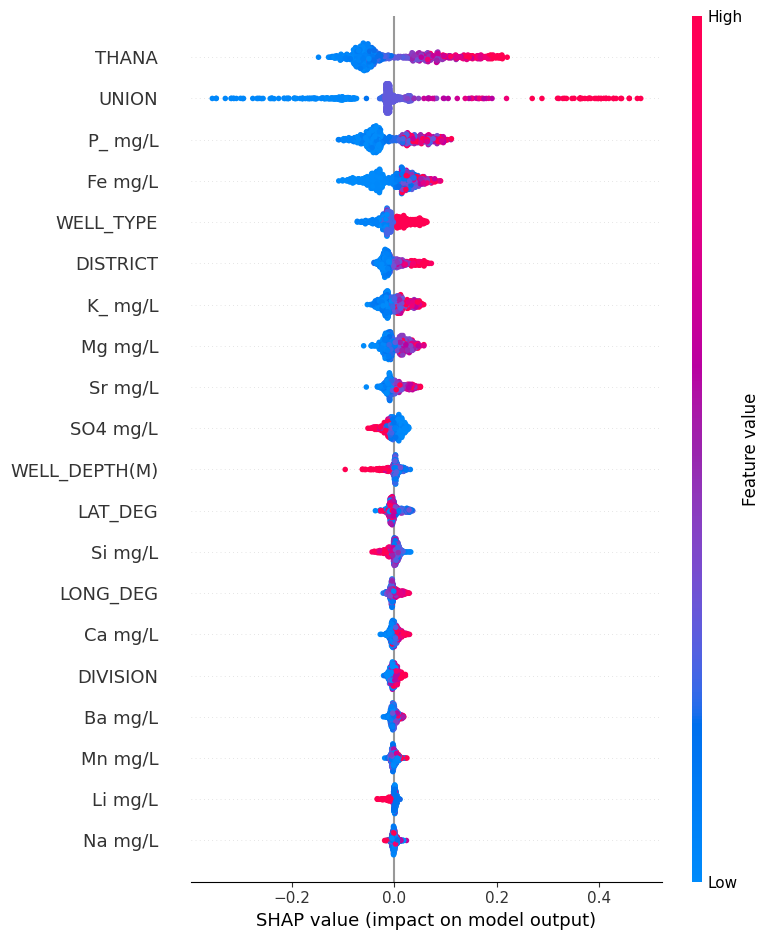

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Ensure RandomForestClassifier is imported


# Use the best fitted estimator from RandomizedSearchCV
model = rcv_random.best_estimator_

explainer = shap.Explainer(model.predict_proba, X_test)

shap_values = explainer(X_test)

class_idx = 1 # Index for the 'Unsafe' class
plt.figure()
# Select SHAP values for the specified class
shap.summary_plot(shap_values[:, :, class_idx], X_test, show=False)
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure()
shap.summary_plot(shap_values[:, :, class_idx], X_test, show=False)  # prevent auto show
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')   # now works!
plt.show()

In [ ]:
plt.figure()
shap.summary_plot(shap_values[:, :, class_idx], X_test, show=False)  # prevent auto show
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')   # now works!
plt.show()